# 0 - O Desafio

"Seu objetivo é prever o salário anual (yearly_wage) de uma amostra de pessoas a partir de dados sóciodemográficos anonimizados.  Para isso são fornecidos dois datasets: um dataset chamado wage_train composto por 32560 linhas, 14 colunas de informação (features) e a variável a ser prevista (“yearly_wage”). 

O segundo dataset chamado de wage_test possui 16281 linhas e 14 colunas e não possui a coluna “yearly_wage”. Seu objetivo é prever essa coluna a partir dos dados enviados e nos enviar para avaliação dos resultados."


    A solução para o problema apresentado é a classificação binária, onde buscamos categorizar em dois valores possíveis, as respostas do modelo preditivo.

# 1 -  Tratamento e Análise Exploratória dos Dados(EDA)

Vamos preparar o ambiente IPython para cumprir todos os requerimentos e importar todas as bibliotecas e módulos utilizadas neste trabalho

In [1]:
# importando bibliotecas e pacotes e preparando o ambiente de execução
import warnings
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import joblib

plt.style.use('seaborn-talk')
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv('./data/wage_train.csv')
df


,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Após inspeção preliminar dos dados, verificamos que a primeira coluna do arquivo foi importada como *'Unnamed: 0'* e que se trata de um índice numérico das linhas do arquivo, e por isso foi dado como desnecessária e removida do dataframe **pandas**, pelo fato do objeto já ter essa funcionalidade nativa.

In [3]:
# removendo coluna de índice carregada a partir do arquivo csv
df.drop('Unnamed: 0', axis=1, inplace=True)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  yearly_wage     32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Os resultados do método **info** revelam que não há valores nulos no dataframe e que o **pandas** identificou corretamente os tipos de dados das variáveis carregadas, num total de 6 numéricas e 9 categóricas.
    Vamos investigar mais a fundo os dados para verificar se encontramos valores faltantes (*missing values*) ou registros com formato corrompido. Para isso vamos conferir os valores únicos de cada coluna categórica.

In [5]:
# lista de variáveis categóricas
categorical = df.columns[df.dtypes==object].tolist()

# lista de variáveis numéricas
numerical = df.columns[df.dtypes=='int64'].tolist()

# inpsecionando os dados categóricos para conferir os valores únicos 
for column in categorical:
    print(f'\033[1m======= Variável: \'{column}\' =======\033[0m')
    print(list(df[column].unique()), '\n')


======= Variável: 'workclass' =======
[' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'] 

======= Variável: 'education' =======
[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'] 

======= Variável: 'marital_status' =======
[' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'] 

======= Variável: 'occupation' =======
[' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv'] 

======= Variável: 'relationship' =======
[' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarri

Verificamos que os valores faltantes nesse conjunto de dados foi representado por *' ?'* e devemos eliminar esse valor do conjunto de dados antes de prosseguirmos com os modelos de machine learning, já que em geral, esse tipo de registro incorreto pode prejudicar seriamente a performance dos modelos. Temos duas soluções típicas para este tipo de problema, um seria eliminar os registros onde os valores faltantes ocorrem, e a outra seria substituir esses valores pela moda da distribuição de cada variável categórica. Cada solução tem seus prós e contras, por isso vamos inspecionar melhor os dados a fim de decidir qual atitude tomar.

In [6]:
# contando as ocorrências dos valores faltantes
(df[df[categorical].columns] == ' ?').sum()


workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
yearly_wage          0
dtype: int64

In [7]:
# contando os registros que contém ' ?' em qualquer uma das colunas selecionadas
df_missing = df[(df['workclass'] == ' ?') | (df['occupation'] == ' ?') | (df['native_country'] == ' ?')]
df_missing.shape


(2399, 15)

A quantidade de registros com pelo menos um valor faltante é de 2399, aproximadamente 7% do total no conjunto de dados. Considerando a opção de remover esses registros, podemos dizer que é uma quantidade aceitável para o descarte, e nosso modelo poderia apresentar uma performance tão boa quanto o esperado, mesmo com essa redução. Vamos ainda avaliar a variabilidade dos dados contidos no dataframe temporário criado na etapa anterior e comparar com o original, a fim de conferir se a remoção desses registros forçaria alguma assimetria no conjunto de dados final.

In [8]:
# inpsecionando os dados categóricos para conferir os valores únicos
for column in categorical:
    print(f'\033[1m======= Variável: \'{column}\' =======\033[0m')
    print(list(df_missing[column].unique()), '\n')
    

======= Variável: 'workclass' =======
[' Private', ' ?', ' State-gov', ' Self-emp-not-inc', ' Self-emp-inc', ' Local-gov', ' Federal-gov', ' Never-worked'] 

======= Variável: 'education' =======
[' Assoc-voc', ' Some-college', ' HS-grad', ' 7th-8th', ' 10th', ' 1st-4th', ' Bachelors', ' Masters', ' 11th', ' Assoc-acdm', ' 12th', ' 5th-6th', ' 9th', ' Doctorate', ' Prof-school', ' Preschool'] 

======= Variável: 'marital_status' =======
[' Married-civ-spouse', ' Never-married', ' Married-spouse-absent', ' Divorced', ' Widowed', ' Separated', ' Married-AF-spouse'] 

======= Variável: 'occupation' =======
[' Craft-repair', ' ?', ' Sales', ' Other-service', ' Adm-clerical', ' Exec-managerial', ' Prof-specialty', ' Machine-op-inspct', ' Transport-moving', ' Handlers-cleaners', ' Priv-house-serv', ' Farming-fishing', ' Tech-support', ' Protective-serv'] 

======= Variável: 'relationship' =======
[' Husband', ' Own-child', ' Not-in-family', ' Wife', ' Unmarried', ' Other-relative'] 

=======

Os resultados da última inspeção mostram que os registros apresentam uma distribuição semelhante a do conjunto original, então parece seguro assumir que a remoção dos registros de fato não afetará drasticamente o comportamento dos modelos.
Antes de tomar a decisão pela primeira opção, vamos conferir a distribuição dos dados nas colunas afetadas pelos valores faltantes, no intuito de verificar o quanto uma possível substituição dos valores afetaria tais distribuições.

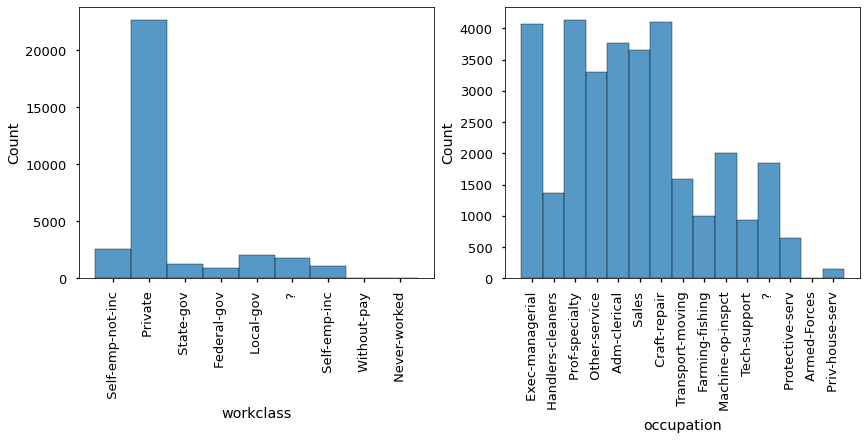

In [9]:
# plotando histogramas para inspeção visual das variáveis selecionadas
missing_values_cols = ['workclass', 'occupation']
plt.figure(figsize=(14,5))
for i, col in enumerate(missing_values_cols):
    ax = plt.subplot(1, len(missing_values_cols), i+1)
    sns.histplot(data=df, x=col, ax=ax)
    plt.xticks(rotation=90)


Observando a distribuição de `'workclass'` e `'occupation'` (as colunas com maior número de valores faltantes) podemos ver que as duas variáveis apresentam comportamentos totalmente distintos. Enquanto que em `'workclass'` uma substituição dos valores pela moda não causaria mudanças significativas no panorama geral da distribuição, `'occupation'` por outro lado teria uma mudança bem expressiva, tendo em vista que os valores predominantes na variável são bem divididos entre 6 elementos, e a quantidade de valores faltantes que seria transferida para o elemento mais frequente causaria um pico na distribuição, uma situação que seria preferível de evitar para manter a consistência do conjunto de dados original.

No caso da última variável, checamos sua distribuição para verificar como os 583 registros onde ocorrem os valores faltantes afetariam o conjunto no caso de substituição.

In [10]:
df.groupby(['native_country']).size()


native_country
 ?                               583
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                

Os números mostram uma maioria absoluta do valor *'United-States'*, totalizando quase 90%, contra menos de 2% para os valores faltantes, neste caso podemos assumir que a substituição dos valores faltantes não causaria problemas significativos para o conjunto de dados. Encerradas as avaliações sobre os valores faltantes, podemos perceber que na lista de países encontramos valores não conformes, e teremos que tratar esses problemas, tais como no valor *'Columbia'*, que provavelmente se refere à 'Colombia', *'Hong'* também provavelmente um erro de registro, se referindo a 'Hong Kong', e aqui fazemos uma pequena ressalva, já que apesar de não ser considerado um país, na época da consolidação do conjunto de dados (1994), Hong Kong ainda era colônia do Império Britânico, e provavelmente considerado de relevância para a proposta inicial do conjunto de dados. Neste caso vamos corrigir o nome e manter o valor, em vez de mudar o seu valor para a China. O último valor não conforme é *'South'* que poderia estar se referindo a três países diferentes, que não temos como avaliar quais seriam, e por isso vamos manter o valor como está, considerando que a pequena quantidade de registros não vá causar maiores problemas para o desempenho final do modelo.

Considerando todas as análises anteriores, decimos então substituir os valores faltantes nas variáveis que apresentam maioria absoluta de algum valor no conjunto, `'workclass'` e `'native_country'`, e remover os registros onde os valores faltantes ocorrem na variável `'occupation'`.

Outro fato relevante sobre as variáveis categóricas é que `'education'` e `'education_num'` contém a mesma informação, onde `'education_num'` é uma codificação ordinal dos valores de `'education'`, na forma de tempo aproximado de estudo para cada valor. Neste caso vamos eliminar a coluna `'education'` do dataframe antes de rodar os modelos preditivos para evitar redundância no conjunto de dados.

In [11]:
# substituindo os valores faltantes pelas respectivas modas
df['workclass'].replace(' ?', ' Private', inplace=True)
df['native_country'].replace(' ?', ' United-States', inplace=True)

# corrigindo os valores não conformes na variável 'native_country'
df['native_country'].replace({' Hong':' Hong-Kong', ' Columbia': ' Colombia'}, inplace=True)

# eliminando os registros que ainda contém ' ?' na variável 'occupation'
df = df[(df['occupation'] != ' ?')]
df.shape


(30717, 15)

Nosso conjunto de dados base agora está livre de impurezas tratáveis e a quantidade final de registros é 30.717.
Vamos inspecionar os mesmos gráficos que plotamos anteriormente, dessa vez com os dados tratados para conferir os resultados.

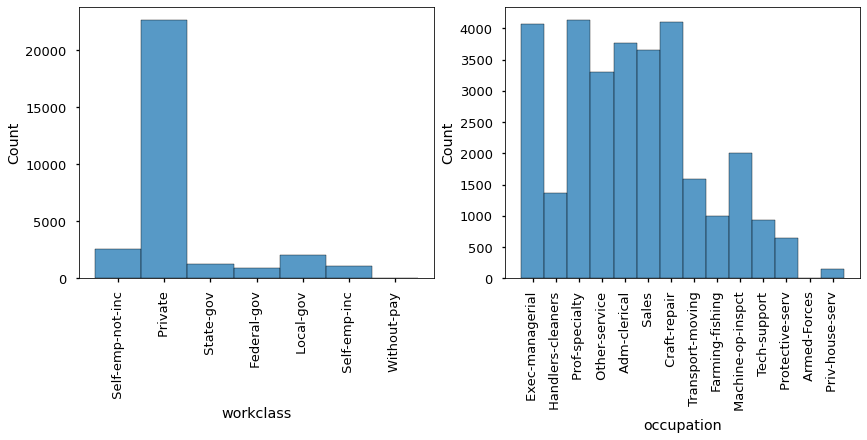

In [12]:
# plotando histogramas para inspeção visual das variáveis selecionadas
plt.figure(figsize=(14,5))
for i, col in enumerate(missing_values_cols):
    ax = plt.subplot(1, len(missing_values_cols), i+1)
    sns.histplot(data=df, x=col, ax=ax)
    plt.xticks(rotation=90)

Para fins de avaliação numérica e posterior modelagem dos dados, vamos aplicar uma codificação binária para a variável resposta `'yearly_wage'`, que é coerente com a sua natureza que só possui dois valores possíveis.

In [13]:
# codificando os valores categóricos para sua equivalência binária numérica
df_raw = df.copy() # cópia do dataframe para uso posterior
df['yearly_wage'].replace({' <=50K':0, ' >50K':1}, inplace=True)
df_raw.groupby(['yearly_wage']).size()


yearly_wage
 <=50K    23067
 >50K      7650
dtype: int64

Vemos novamente que o conjunto de dados é desbalanceado também na variável de resposta, tendo cerca de 3/4 dos registro com ' <=50K' e apenas 1/4 com ' >50K'.

Vamos partir para analizar as variáveis numéricas presentes no conjunto de dados e conferir se existem problemas a serem tratados nesse tipo de dado também. Vamos começar avaliando a correlação das variáveis com a variável resposta através da representação visual do mapa de calor.

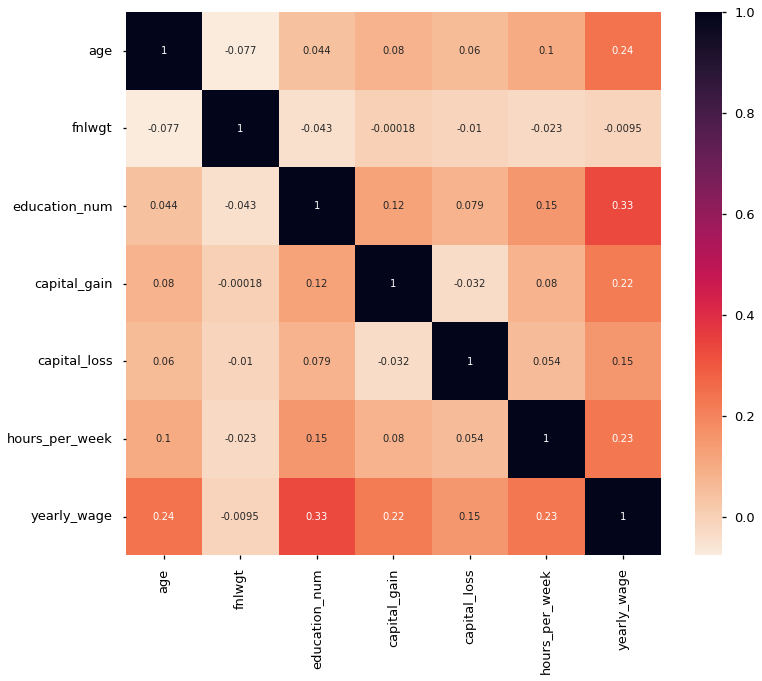

In [14]:
# plotando mapa de calor com a correlação das variáveis numéricas
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='rocket_r')
plt.show()


O resultado acima aponta que a variável `'fnlwgt'` apresenta valores negativos de correlação com todas as variáveis do conjunto, incluindo a variável resposta, além de todos serem absolutamente muito baixos, e sendo assim vamos eliminá-la do conjunto final, para evitar que a sua presenção comprometa o desempenho dos modelos preditivos. Outra inferência possível da representação acima é que a o tempo de estudo é a variável de maior correlação com a possibilidade de salários mais altos, dentro do conjunto de dados. Uma hipótese válida e um resultado dentro do esperado.

In [15]:
# removendo coluna 'fnlwgt' do dataframe
df.drop('fnlwgt', axis=1, inplace=True)
# atualizando a lista das variáveis numéricas do conjunto de dados
numerical.remove('fnlwgt')


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30717.0,38.443565,13.118441,17.0,28.0,37.0,47.0,90.0
education_num,30717.0,10.130221,2.562458,1.0,9.0,10.0,13.0,16.0
capital_gain,30717.0,1106.002311,7497.982938,0.0,0.0,0.0,0.0,99999.0
capital_loss,30717.0,88.913110,405.663489,0.0,0.0,0.0,0.0,4356.0
hours_per_week,30717.0,40.949344,11.985576,1.0,40.0,40.0,45.0,99.0
yearly_wage,30717.0,0.249048,0.432469,0.0,0.0,0.0,0.0,1.0


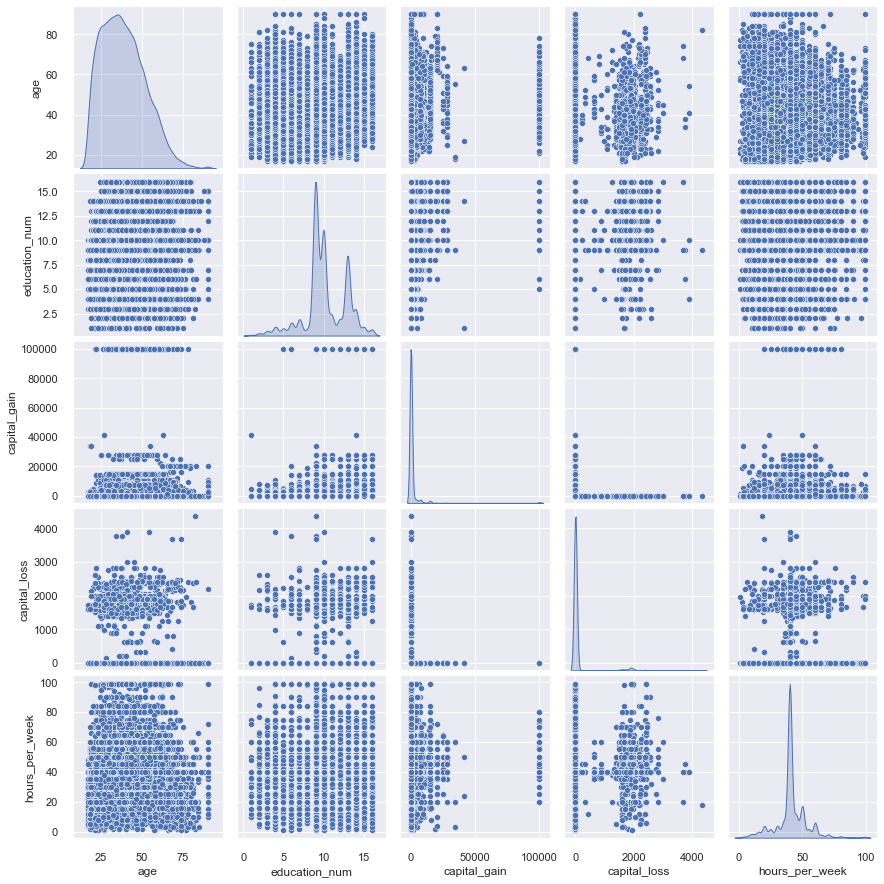

In [17]:
# visualização cruzada das variáveis numéricas do conjunto de dados
sns.set()
# usando o "kde' para representar a diagonal em vez do histograma padrão
sns.pairplot(df[numerical], diag_kind='kde')
plt.show()


Como esperado, os valores das variáveis `'capital_gain'` e `'capital_loss'` são altamente assimétricos, e além disso a escala dos valores também é muito diferente do restante dos dados no conjunto, o que indica que precisaremos tratar esses valores com alguma transformação para aliviar a obliquidade e evitar a influência negativa de eventuais *outliers*. Vamos prosseguir com a análise das variáveis numéricas, dessa vez representando visualmente as medidas de posição obtidas anteriormente.

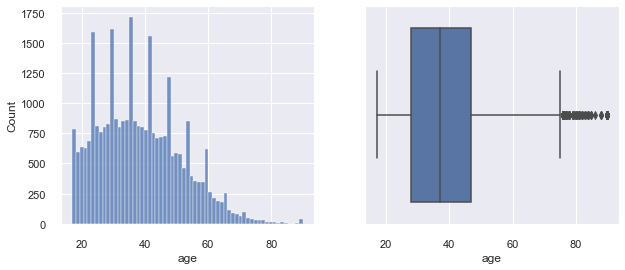

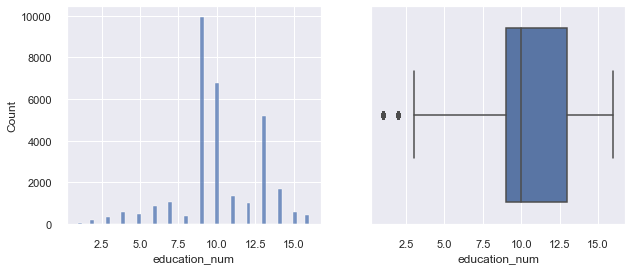

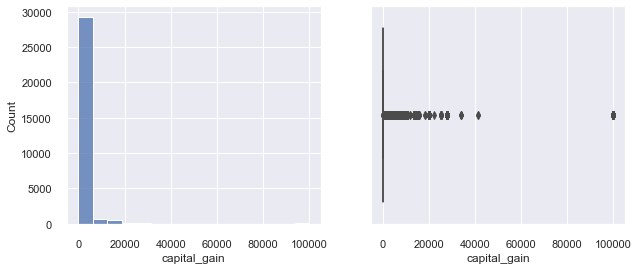

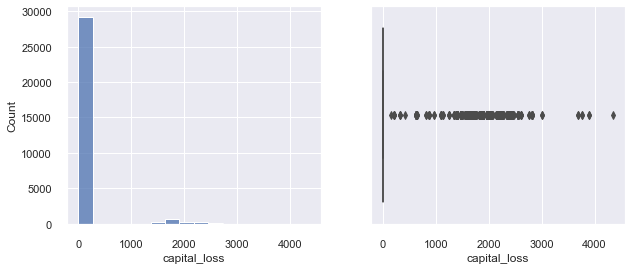

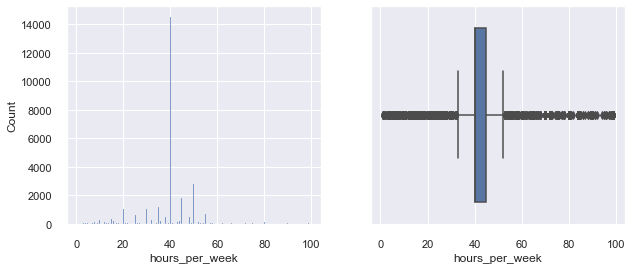

In [18]:
# plotando lado a lado o histograma e o boxplot de cada variável numérica
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=df, x=col, ax=ax[0])
    sns.boxplot(data=df, x=col, ax=ax[1])


Os resultados acima demonstram o padrão de comportamento assimétrico positivo nas variáveis representadas, evidenciado pela posição da mediana no intervalor de quartis, deslocada para a esquerda em praticamente todas as variáveis.

Concluídas a preparação e a descrição dos dados, vamos seguir com a análise exploratória para entender um pouco da população no conjunto e como suas características se relacionam com a variável resposta.

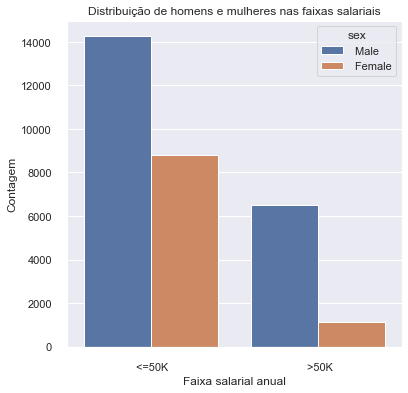

In [19]:
# plotando gráficos para EDA
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df_raw, x='yearly_wage', hue='sex')
ax.set(xlabel='Faixa salarial anual')
ax.set(ylabel='Contagem')
ax.set_title('Distribuição de homens e mulheres nas faixas salariais')
plt.show()

Considerando o grupos dos ricos (salários maiores que 50 mil), os homens representam 5x o número de mulheres, enquanto que no grupo dos pobres (salários menores ou iguais a 50 mil) a diferença na quantidade de homens e mulheres cai drasticamente, sendo os homens menos que o dobro das mulheres.

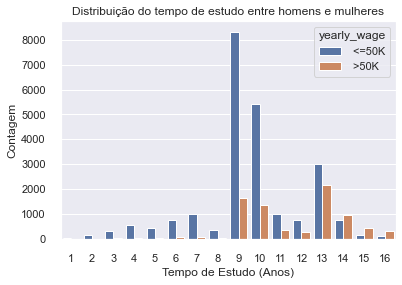

In [20]:
# plotando gráficos para EDA
ax = sns.countplot(data=df_raw, x='education_num', hue='yearly_wage')
ax.set(xlabel='Tempo de Estudo (Anos)')
ax.set(ylabel='Contagem')
ax.set_title('Distribuição do tempo de estudo entre homens e mulheres')
plt.show()

Constatamos que quase a totalidade dos indivíduos no grupo dos ricos pelo menos concluíram o ensino médio (9 anos), que é também o valor de educação onde ocorre a maior quantidade de indivíduos dentre todos os grupos, enquanto a graduação superior (13 anos) é a campeã de ocorrência de altos salários.

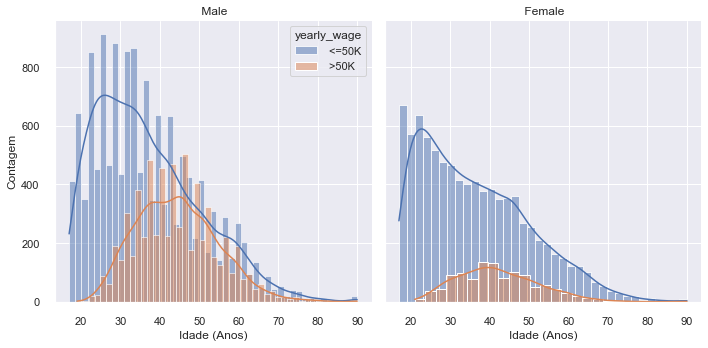

In [21]:
# plotando gráficos para EDA
ax = sns.FacetGrid(data=df_raw, col="sex", hue="yearly_wage", height=5, legend_out=False)
ax.map(sns.histplot, 'age', kde=True)
ax.add_legend()
ax.set(xlabel='Idade (Anos)')
ax.set(ylabel='Contagem')
ax.set_titles("{col_name}")
plt.show()

A população de mulheres no grupo dos pobres se apresenta bem concentrada entre as mais jovens, enquanto os homens se apresentam de forma melhor distribuída e alguns anos mais velhos em termos de centralidade.

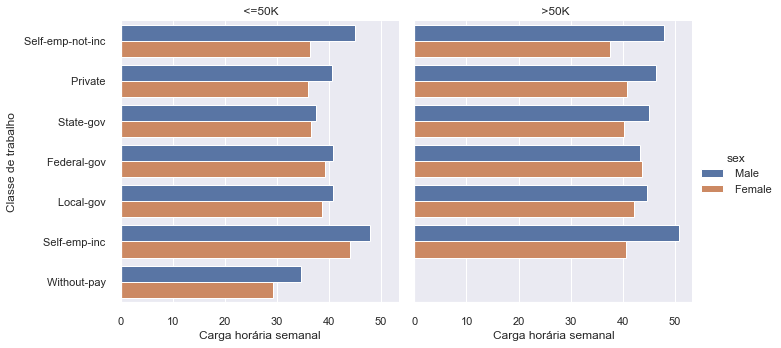

In [22]:
# plotando gráficos para EDA
ax = sns.factorplot(x ='hours_per_week', y ='workclass', kind = 'bar', 
                    hue = 'sex', col='yearly_wage', data = df_raw, ci=False)
ax.set(xlabel='Carga horária semanal')
ax.set_ylabels('Classe de trabalho')
ax.set_titles("{col_name}")
plt.show()

Dentre os ricos, homens e mulheres têm cargas de trabalho semanais parecidas, porém os homens trabalham mais horas na mesma classe de trabalho. No grupo que recebe >50k, as diferenças aumentam, e na categoria *' Federal-gov'* são as mulheres que trabalham mais horas por semana. Nenhum dos indivíduos que trabalham sem receber salário ocupa o grupo dos mais ricos.

De agora em diante, vamos fazer ajustes necessários no conjunto de dados, para torná-lo mais favorável para o trabalho dos modelos preditivos. 

In [23]:
# separando o conjunto de dados em variáveis preditoras e variável resposta
features_init_df = df[df.columns[:-1]]
features_init_df.drop('education', axis=1, inplace=True)
target_df = df['yearly_wage']


A transformação escolhida para os valores das colunas e ganho e perda de capital foi a logarítmica, muito usada para fins de redução de escala e alívio de assimetria de distribuições.

In [24]:
# aplicando a função logarítmica para transformar os dados 
skewed_cols = ['capital_gain', 'capital_loss']
features_log_df = features_init_df.copy()
# log(x+1) é um leve ajuste para lidar com o valor indefinido de log(0)
features_log_df[skewed_cols] = features_init_df[skewed_cols].apply(lambda x: np.log(x+1))


Para oferecer melhores condições de desempenho para os modelos, vamos aplicar a normalização em todas as variáveis numéricas, a fim de eliminar as diferenças de escala entre as diferentes variáveis, o resultado da normalização afeta a escala dos dados, mas preserva o formato da distribuição. Outra opção seria utilizar a padronização, que não é sensível aos outliers, mas como transformamos nossas variáveis mais problemáticas com a função logarítmica, esperamos que a normalização seja uma opção válida. 

In [25]:
# instanciando um normalizador para aplicar sobre os dados
scaler = MinMaxScaler() # escala padrão sendo de 0 a 1

# aplicando a normalização nas variáveis preditoras numéricas
features_log_normalized_df = features_log_df.copy()
features_log_normalized_df[numerical] = scaler.fit_transform(features_log_df[numerical])

A última etapa de tratamento dos dados é a codificação das variáveis categóricas (*encoding*), processo necessário devido ao fato dos modelos preditivos trabalharem apenas no valores numéricos. Dessa forma precisamos definir o método de codificação que iremos utilizar antes de prosseguir com a criação dos modelos preditivos.
Existem várias opções de codificação possíveis, cada uma com suas características, vantagens e desvantagens. Um dos principais fatores de escolha para o método de codificação mora na natureza da variável, onde precisamos saber se existe ou não ordem hierárquica nas classes presentes. Em nosso conjunto de dados, uma variável já veio com sua própria codificação ordinal, a qual foi mantida, onde o valor categórico se refere a um grau de estudo, e seu valor codificado é um valor numérico cada vez maior, ao passo que aumenta o grau de estudo, no caso representado pelo tempo de estudos em anos. Todas as outras variáveis do conjunto apresentaram natureza nominal, onde não podemos imputar ordem ou quantidade entre os valores.
Para a codificação nominal, usaremos o método que provavelmente é mais utilizado, o chamado *One-Hot Encoding* onde cada valor de uma variável categórica é associado a uma coluna combinada, onde todos os valores são '1' onde o valor ocorre, e '0' em todos os outros valores. Dessa forma, se uma variável possui 5 valores únicos, serão geradas 5 colunas. COnsiderando o tamanho e dimensionalidade do nosso conjunto de dados, é seguro dizer que esse método de codificação não vai acarretar problemas de sobrecarga no processamento, mesmo em máquinas menos poderosas.

In [26]:
# codificando os dados em 'features_log_normalized' 
features_df = pd.get_dummies(features_log_normalized_df) # One-Hot Encoding
# removendo coluna
features_df.drop('native_country_ Holand-Netherlands', axis=1, inplace=True)

Na etapa anterior tivemos que remover a coluna *dummy* `'native_country_ Holand-Netherlands'`, porque essa ocorrência só existe no arquivo de treino, o que resulta num dimensionamento distinto entre o conjunto que será usado para treinar o modelo, daquele que usaremos para gerar as predições. Essa diferença acarreta um erro, pois o modelo espera um número de argumentos de entrada que não será entregue no conjunto de variáveis preditoras.

In [27]:
# mostra a quantidade final de variáveis no conjunto após One-Hot Encoding 
encoded = list(features_df.columns)
print("Total de colunas no dataframe após One-Hot Encoding: {}".format(len(encoded)))


Total de colunas no dataframe após One-Hot Encoding: 86


Vamos dividir os dados em conjuntos de treino e de teste com a ajuda da função **train_test_split**, que embaralha e divide aleatoriamente os dados, numa proporção definida por parâmetro, neste caso usaremos 30% para teste e 70% para treino. 

In [28]:
# dividindo os em conjuntos de teste e treino
X_train, X_test, y_train, y_test = train_test_split(features_df, 
                                    target_df, test_size =0.3, random_state=1) 

# mostra o resultado da divisão 
print("Tamanho do conjunto de treino: {}".format(X_train.shape[0]))
print("Tamanho do conjunto de teste: {}".format(X_test.shape[0]))

Tamanho do conjunto de treino: 21501
Tamanho do conjunto de teste: 9216


# 2 - Construindo os modelos preditivos

Vamos iniciar o processo de testes dos modelos de aprendizagem de máquina com suas configurações padrão, sem ajustes de hiperparâmetros, para evitar impor qualquer predileção entre os modelos. As escolhas dos modelos não seguiu nenhum critério particular, apenas utilizamos modelos clássicos e comuns nesse tipo de classificação.

In [29]:
# instanciando os modelos de classificação
knn = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lrc = LogisticRegression()
abc = AdaBoostClassifier() #Modelo padrão: Árvore de Decisão
gbc = GradientBoostingClassifier() #Modelo padrão: Árvore de Decisão

# listando os modelos para facilitar o fluxo de processamento a seguir
classifiers = [knn, gnb, dtc, rfc, lrc, abc, gbc]

Vamos apresentar uma breve descrição dos modelos utilizados no trabalho, trazendo suas características, vantagens e eventuais desvantagens:

- K-ésimo Vizinho Mais Próximo: Um modelo simples, quase rudimentar, muito usado em aplicações de classificação espectral de imagens, que diferente de outros modelos abordados aqui, não trabalha com a visão generalista dos dados, e sim em instâncias locais, definidas entre os k-ésimos vizinhos mais próximos do ponto em análise, e a classificação é computada pela maioria de votos nas instâncias. Altamente dependente da qualidade dos dados para um bom desempenho, pode ser especialmente sensível a ruídos, outliers e valores faltantes. Acaba sendo pouco indicado para conjuntos de dados muito grandes ou com dimensionalidade muito alta.

- Naive Bayes: Um classificador muito simples e rápido, costuma ter bons resultados mesmo em conjuntos com pequenas quantidades de amostras de treinamento, mas de todos os modelos selecionados, é o que promete menor desempenho, principalmente por ele ser pouco indicado para problemas de classificação, especialmente em um conjunto de dados como o nosso, que apresenta muitas variáveis de distribuição assimétrica, variáveis esparsas e valores escassos. É um modelo que trabalha sobre a presunção de distribuição gaussiana dos dados, e com o princípio de independência, que implica que a existência de um valor em um registro não afeta a presença de outro.

- Árvore de Decisão: Um dos modelos de classificação mais utilizado, tanto por sua simplicidade e clareza, quanto pela capacidade de classificar eficientemente dados numéricos ou categóricos, como pouco tratamento prévio e consideravelmente menos esforço computacional que outros modelos. O modelo ainda mostra claramente a influência de cada variável para o processo de aprendizagem. Apesar das vantagens, as árvores de decisão encontram dificuldades ao trabalhar com conjuntos de dados de dimensionalidade muito alta, já que o custo computacional passa a crescer drasticamente. Além disso, o modelo é mais suscetível a erro quando o conjunto de dados tem muitas classes a prever, e relativamente poucas amostras de treinamento.

- Florestas Aleatórias: Por se tratar de um modelo "Ensemble" da árvore de decisão (como o próprio nome sugere) ele possui a maioria das vantagens do modelo fundamental, além de corrigir alguns de seus problemas, como a tendência de sobreajuste com o conjunto de treinamento. Apesar disso, as florestas aleatórias ainda são suscetíveis a sobreajuste quando os dados apresentam muito ruído.

- Regressão Logística: É um modelo altamente apropriado para problemas de classificação binária, especialmente categóricas. Bastante resistente a sobreajuste e não é dependente de normalidade de distribuições, como outros modelos. Apesar de ser indicada para muitos problemas práticos de classificação, é um modelo que depende de conjuntos muito grandes de dados para apresentar um desempenho adequado, além de ser sensível a pontos fora da curva (outliers). 

- AdaBoost: Do inglês (Adaptive Boosting), o AdaBoost é um algoritmo meta-heurístico de estímulo adaptável, que na verdade é implementado sobre outro modelo de aprendizado para melhorar seu desempenho, também considerado "ensemble". Possui a vantagem de ser menos suscetível ao sobreajuste (overfitting) do que a maioria dos algoritmos de aprendizado de máquina, para alguns problemas. Apesar disso, o modelo ainda é sensível ao ruído nos dados e casos isolados (outliers).

- Gradient Boosting: Outro modelo "ensemble", o gradient boosting constrói o modelo em etapas, através da generalização de outros métodos de boosting, sobre uma função de perda diferenciável arbitrária. É o tipo de modelo que foi construído para ser uma solução "pronta" (off-the-shelf), e atingir bons resultados em diversas aplicações. Também usa árvores de decisão como modelo de aprendizado básico.

In [30]:
# laço de treinamento dos modelos
for clsf in classifiers:
    clsf.fit(X_train, y_train)
    predictor = clsf.predict(X_test)
    print(clsf)
    print(classification_report(y_test, predictor))
    print('Matriz de confusão:')
    print(confusion_matrix(y_test, predictor))
    print('{}'.format('='*53)) # linha separadora, para efeito estético
    

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      6914
           1       0.66      0.61      0.63      2302

    accuracy                           0.82      9216
   macro avg       0.77      0.75      0.76      9216
weighted avg       0.82      0.82      0.82      9216

Matriz de confusão:
[[6199  715]
 [ 901 1401]]
GaussianNB()
              precision    recall  f1-score   support

           0       0.96      0.43      0.59      6914
           1       0.35      0.94      0.51      2302

    accuracy                           0.55      9216
   macro avg       0.65      0.68      0.55      9216
weighted avg       0.81      0.55      0.57      9216

Matriz de confusão:
[[2939 3975]
 [ 133 2169]]
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6914
           1       0.64      0.60      0.62      2302

    accuracy               

Os relatórios de classificação gerados pela etapa anterior trazem as principais métricas de avaliação de desempenho dos modelos:
- Acurácia: Que basicamente mede a taxa de acerto das predições em comparação com os resultados reais
- Precisão: Nos diz quantas classificações foram acertadas dentre as classificações positivas do modelo. 
- Memória ou Revocação: Nos informa dentre as amostras positivas existentes, quantas o modelo conseguiu classificar corretamente.
- F1-score: Que indica a média ponderada entre Precisão e Memória .

As métricas que consideramos mais apropriadas, para avaliar o desempenhos dos modelos preditivos, foram **Precisão e Revocação** (e indiretamente F1-score). Consideramos que a combinação das duas métricas traz uma abordagem focal sobre a habilidade de detectar a ocorrência de uma determinada classe, que seria um possibilidade com dados semelhantes aos nossos. Supondo que uma agência governamental precisasse definir, dentre os indivíduos em um cadastro, um grupo de alta vulnerabilidade social para pagar um auxílio, como o auxílio Brasil,  é evidente que uma maior capacidade de separação é desejável.

O modelo Gradient Boosting apresentou a melhor performance base entre todos os modelos, segundo as métricas que definimos previamente, e seguiremos avaliando sua capacidade de desempenho com novos conjuntos de dados, e para isso faremos uso da validação cruzada.

O foco da validação cruzada é de testar a habilidade do modelo de fazer predições adequadas sobre novos conjuntos de dados, os quais não foram usados para o seu treinamento. Dessa forma conseguimos verificar se o modelo apresentou sobreajuste no conjunto de treino ou algum viés seletivo, e assim avaliamos a capacidade de generalização do modelo, e estimamos seu potencial funcionamento em outras aplicações após sua produção, que é o nosso principal objetivo no aprendizado de máquina.

In [31]:
# aplicando a validação cruzada no modelo selecionado
cv = cross_val_score(gbc, X_train, y_train, cv=8)
print(gbc, cv.mean())

GradientBoostingClassifier() 0.8622398740851012


Vamos verificar outra métrica útil para avaliação (e comparação) de modelos, que é a curva característica de operação do receptor, representada na relação probabilística entre falsos positivos e verdadeiros positivos, ao longo de uma lista de possíveis valores limiares (entre 0,0 e 1,0). É uma curva que nos diz o quanto o modelo é capaz de distinguir entre as classes. A área sob a curva é usada como uma métrica de performance, onde quanto mais alto o valor da área (AUC-ROC) maior a capacidade de distinção do modelo. A seguir iremos plotar a curva ROC para nosso modelo.

In [32]:
# função para plotar o gráfico da curva característica de operação do receptor (ROC curve)
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva Característica de Operação do Receptor (ROC)')
    plt.legend()
    plt.show()


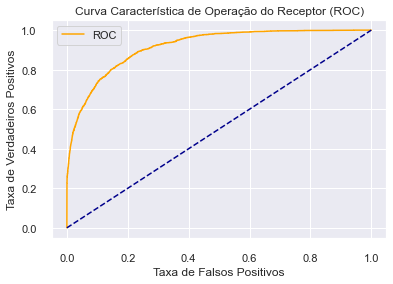

In [33]:
# configurando a curva ROC para plotagem
probs = gbc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

# 3 - Ajustes de hiperparâmetros e Definição do modelo final

Tendo decidido pelo classificador Gradient Boosting, vamos definir um conjunto de possíveis parâmetros e avaliar o desempenho do modelo para cada valor. Esse processo é feito automaticamente através da **GridSearchCV**.

In [34]:
# dicionário de opções de parâmetros a serem testados pela GridSearchCV
hyper_params = {'learning_rate': [0.1, 0.01],
                'max_depth': [3, 4, 5],
                'min_samples_leaf': [1,2],
                'min_samples_split': [2,3],
                'n_estimators': [10, 30, 100, 300]
               }

In [35]:
# instanciando o objeto gscv para aplicação da GridSearch
gscv = GridSearchCV(gbc, hyper_params)

In [36]:
# treinando o modelo com os hiperparâmetros definidos
gscv_results = gscv.fit(X_train, y_train)

In [37]:
# dicionário de melhores parâmetros para o modelo final
gscv_results.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [38]:
# informa a maior pontuação da métrica atingida no processo
print('Maior pontuação atingida: {:.0f}%'.format(gscv_results.best_score_*100))

Maior pontuação atingida: 87%


Trazemos a representação final da curva ROC para o modelo calibrado, para evidenciar a qualidade final do modelo.

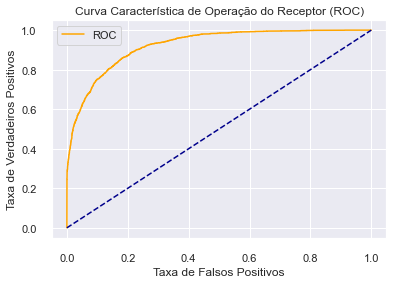

In [39]:
# configurando a curva ROC para plotagem
probs = gscv_results.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

Salvamos o modelo final no arquivo indicado, em formato .obj, através do módulo **joblib**, que entre outras opções permite a preservação em disco de objetos Python para posterior carregamento, se necessário.

In [40]:
# salva modelo final no arquivo indicado
joblib.dump(gscv_results, './data/DSChallenge_best_model.obj')

['./data/DSChallenge_best_model.obj']

Concluimos a definição do nosso modelo preditivo, que está pronto para produção, com um desempenho consideravelmente bom, de acordo com as métricas definidas.

# 4 - Aplicando o modelo final sobre os dados de teste do desafio

Carregamos os dados propostos no desafio para o teste do modelo, e realizamos no novo conjunto de dados, todos os processos de preparação que foram descritos nas etapas iniciais do trabalho.

In [41]:
# carrega arquivo de teste proposto
df_pred = pd.read_csv('./data/wage_test.csv')
# elimina coluna de índice numérico desnecessária
df_pred.drop('Unnamed: 0', axis=1, inplace=True)
# substituindo os valores faltantes pelas respectivas modas
df_pred['workclass'].replace(' ?', ' Private', inplace=True)
df_pred['native_country'].replace(' ?', ' United-States', inplace=True)
# corrigindo os valores não conformes na variável 'native_country'
df_pred['native_country'].replace({' Hong':' Hong-Kong', ' Columbia': ' Colombia'}, inplace=True)
# eliminando os registros que ainda contém ' ?' na variável 'occupation'
df_pred = df_pred[(df_pred['occupation'] != ' ?')]
# removendo coluna
df_pred.drop('fnlwgt', axis=1, inplace=True)
# separando o conjunto de dados em variáveis preditoras e variável resposta
features_pred_init_df = df_pred.copy()
features_pred_init_df.drop('education', axis=1, inplace=True)


Continuamos operando sobre os novos dados, dessa vez fazendo as transformações e codificações para adequação para o modelo final treinado.

In [42]:
# aplicando a função logarítmica para transformar os dados 
features_pred_log_df = features_pred_init_df.copy()
# log(x+1) é um leve ajuste para lidar com o valor indefinido de log(0)
features_pred_log_df[skewed_cols] = features_pred_init_df[skewed_cols].apply(lambda x: np.log(x+1))
# instanciando um normalizador para aplicar sobre os dados
scaler = MinMaxScaler() # escala padrão sendo de 0 a 1
# aplicando a normalização nas variáveis preditoras numéricas
features_pred_log_normalized_df = features_pred_log_df.copy()
features_pred_log_normalized_df[numerical] = scaler.fit_transform(features_pred_log_df[numerical])
# codificando os dados em 'features_log_normalized' 
features_pred_df = pd.get_dummies(features_pred_log_normalized_df) # One-Hot Encoding

O modelo final é carregado e aplicado sobre os novos dados, e o arquivo de respostas finais é gerado no caminho defido abaixo:

In [43]:
# carrega o modelo salvo no arquivo
model_run = joblib.load('./data/DSChallenge_best_model.obj')

# armazena o resultado das predições num array NumPy
results = model_run.predict(features_pred_df)

predict_df = features_pred_df.copy()
# adicionando os resultados da predição ao dataframe dos dados de predição
predict_df['predictedValues'] = results.tolist()


In [44]:
# escreve arquivo cvs, a partir do dataframe, com as colunas formatadas
pd.DataFrame(predict_df).to_csv('./data/predicted.csv',index=True, index_label='rowNumber', columns=['predictedValues'])


    Assim concluímos o desafio proposto, numa jornada de aprendizado (não só de máquina 😉) que durou longos dias e noites, e chega ao fim com a sensação de objetivo cumprido. Obrigado por me acompanhar até aqui, e até breve!